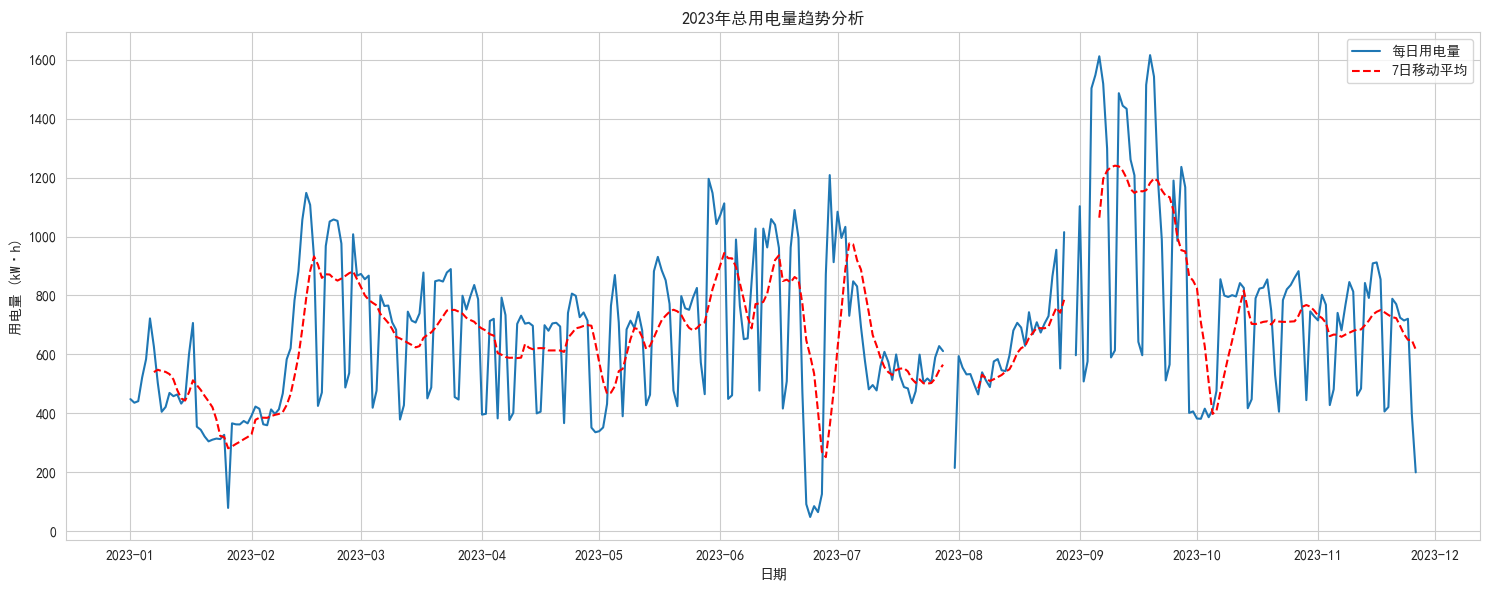

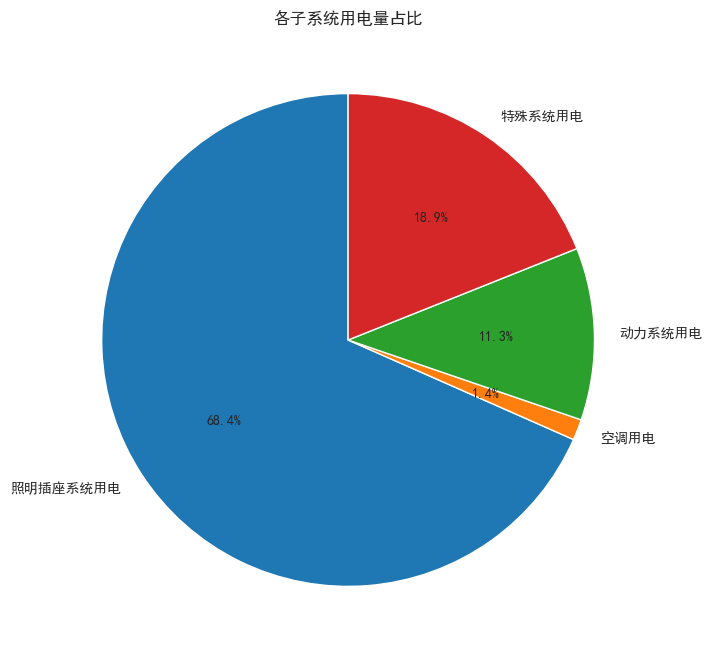

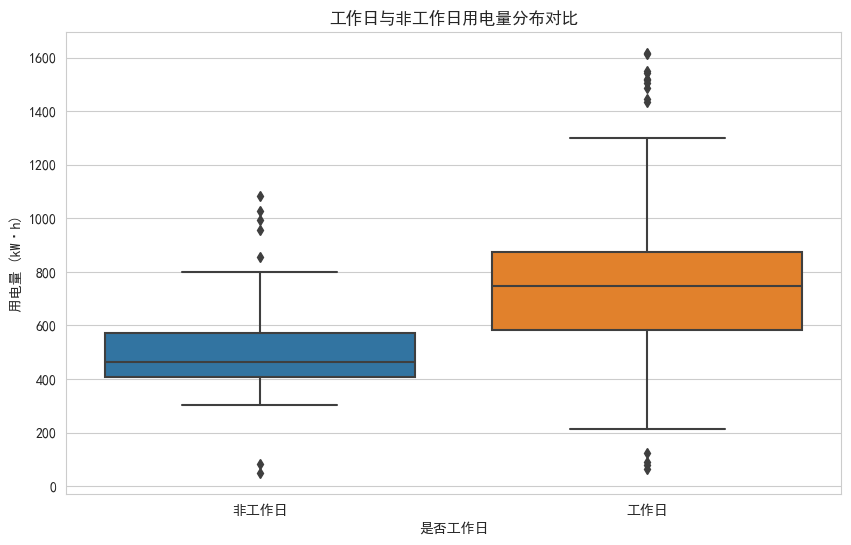

工作日与非工作日用电统计：
             mean  median         std
是否工作日                                
工作日    759.127637  748.75  281.225290
非工作日   505.115591  464.75  167.507611


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df_sheet1 = pd.read_excel('2023年用电量统计.xlsx', sheet_name='Sheet1')
df_sheet2 = pd.read_excel('2023年用电量统计.xlsx', sheet_name='Sheet2')

df_sheet1['日期'] = pd.to_datetime('2023-' + df_sheet1['时间'], format='%Y-%m-%d')
df_sheet1 = df_sheet1.sort_values('日期').reset_index(drop=True)

plt.figure(figsize=(15, 6))
plt.plot(df_sheet1['日期'], df_sheet1['电 kW·h'], label='每日用电量')
plt.plot(df_sheet1['日期'], df_sheet1['电 kW·h'].rolling(7).mean(),
         color='red', linestyle='--', label='7日移动平均')
plt.gca().xaxis.set_major_locator(MonthLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.title('2023年总用电量趋势分析')
plt.xlabel('日期')
plt.ylabel('用电量 (kW·h)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

subsystems = ['照明插座系统用电', '空调用电', '动力系统用电', '特殊系统用电']
total = df_sheet1[subsystems].sum()

plt.figure(figsize=(8, 8))
plt.pie(total, labels=total.index, autopct='%1.1f%%', startangle=90)
plt.title('各子系统用电量占比')
plt.show()

df_sheet2['是否工作日'] = df_sheet2['weekday'].apply(lambda x: '工作日' if x <= 5 else '非工作日')

weekday_stats = df_sheet2.groupby('是否工作日')['电 kW·h'].agg(['mean', 'median', 'std'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='是否工作日', y='电 kW·h', data=df_sheet2)
plt.title('工作日与非工作日用电量分布对比')
plt.ylabel('用电量 (kW·h)')
plt.show()

print("工作日与非工作日用电统计：")
print(weekday_stats)

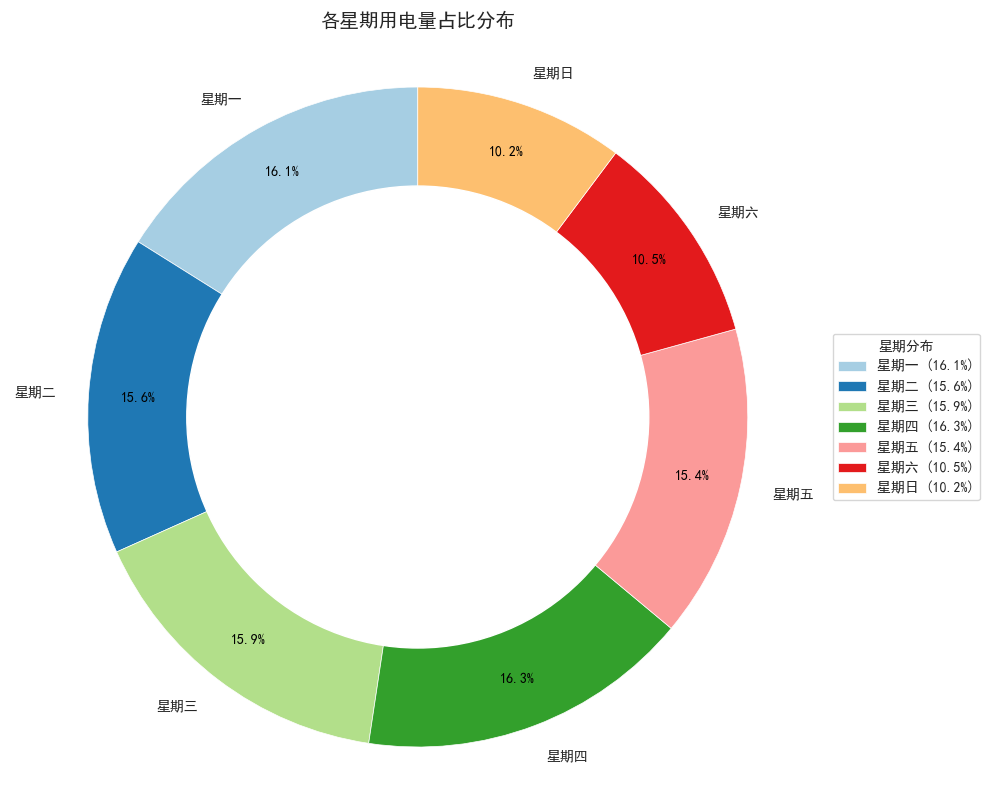

In [3]:

weekday_names = {
    1: '星期一',
    2: '星期二',
    3: '星期三',
    4: '星期四',
    5: '星期五',
    6: '星期六',
    7: '星期日'
}

df_sheet2['星期名称'] = df_sheet2['weekday'].map(weekday_names)

weekday_percent = df_sheet2.groupby('星期名称')['电 kW·h'].sum().sort_index()
weekday_percent = weekday_percent / weekday_percent.sum() * 100

colors = plt.cm.Paired.colors
order = ['星期一', '星期二', '星期三', '星期四', '星期五', '星期六', '星期日']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    weekday_percent[order],
    labels=order,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.5}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold", color='black')
plt.setp(texts, size=10)
plt.title('各星期用电量占比分布', pad=20, fontsize=14)
plt.axis('equal')

plt.legend(
    wedges,
    [f"{l} ({p:.1f}%)" for l, p in zip(order, weekday_percent[order])],
    title="星期分布",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()

In [10]:
from pyecharts.charts import Line, Pie, Boxplot
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import pandas as pd

# 数据准备 (复用之前的DataFrame)
df_sheet1 = pd.read_excel('2023年用电量统计.xlsx', sheet_name='Sheet1')
df_sheet2 = pd.read_excel('2023年用电量统计.xlsx', sheet_name='Sheet2')

df_sheet1['日期'] = pd.to_datetime('2023-' + df_sheet1['时间'], format='%Y-%m-%d')
df_sheet1 = df_sheet1.sort_values('日期').reset_index(drop=True)
line = (
    Line()
    .add_xaxis(df_sheet1['日期'].dt.strftime('%Y-%m-%d').tolist())
    .add_yaxis("每日用电量", df_sheet1['电 kW·h'].round(2).tolist())
    .add_yaxis("7日移动平均", df_sheet1['电 kW·h'].rolling(7).mean().round(2).tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="2023年总用电量趋势分析", pos_left="10%"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        datazoom_opts=[opts.DataZoomOpts(type_="inside")],
        xaxis_opts=opts.AxisOpts(
            name="日期",
            axislabel_opts=opts.LabelOpts(rotate=45)
        ),
        yaxis_opts=opts.AxisOpts(
            name="用电量 (kW·h)",
            splitline_opts=opts.SplitLineOpts(is_show=True)
        )
    )
)

subsystems =['照明插座系统用电', '空调用电', '动力系统用电', '特殊系统用电']
sub_data = df_sheet1[subsystems].sum().items()

pie_subsystem = (
    Pie()
    .add(
        "",
        [list(item) for item in sub_data],
        radius=["35%", "55%"],
        center=["50%", "50%"],
        label_opts=opts.LabelOpts(
            position="outside",
            formatter="{b}: {d}%"
        )
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="子系统用电占比"),
        legend_opts=opts.LegendOpts(
            orient="vertical",
            pos_top="15%",
            pos_left="2%"
        )
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            formatter="{b}: {c} kW·h ({d}%)")
    )
)

df_sheet2['是否工作日'] = df_sheet2['weekday'].apply(lambda x: '工作日' if x <= 5 else '非工作日')
workday_data = [
    df_sheet2[df_sheet2['是否工作日'] == '工作日']['电 kW·h'].tolist(),
    df_sheet2[df_sheet2['是否工作日'] == '非工作日']['电 kW·h'].tolist()
]

boxplot = (
    Boxplot()
    .add_xaxis(['工作日', '非工作日'])
    .add_yaxis("", Boxplot.prepare_data(workday_data))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="工作日用电分布对比"),
        yaxis_opts=opts.AxisOpts(
            name="用电量 (kW·h)",
            splitarea_opts=opts.SplitAreaOpts(is_show=True)),
        tooltip_opts=opts.TooltipOpts(
            formatter=JsCode(
                "function (params) {"
                "return '最大值: ' + params.data[5] + '<br/>'"
                " + 'Q3: ' + params.data[4] + '<br/>'"
                " + '中位数: ' + params.data[3] + '<br/>'"
                " + 'Q1: ' + params.data[2] + '<br/>'"
                " + '最小值: ' + params.data[1];}"
            )
        )
    )
)

weekday_names = {1: '周一', 2: '周二', 3: '周三', 4: '周四', 5: '周五', 6: '周六', 7: '周日'}
df_sheet2['星期'] = df_sheet2['weekday'].map(weekday_names)
week_data = df_sheet2.groupby('星期')['电 kW·h'].sum().reindex(weekday_names.values())

pie_week = (
    Pie()
    .add(
        "",
        [list(item) for item in week_data.items()],
        radius=["30%", "65%"],
        center=["50%", "50%"],
        rosetype="radius",
        label_opts=opts.LabelOpts(formatter="{b|{b}}\n{d}%",
                                  rich={"b": {"fontSize": 14}})
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各星期用电量占比"),
        legend_opts=opts.LegendOpts(
            orient="vertical",
            pos_top="15%",
            pos_left="2%"
        )
    )
    .set_series_opts(
        tooltip_opts=opts.TooltipOpts(
            formatter="{b}: {c} kW·h ({d}%)")
    )
)

line.render("用电趋势.html")
pie_subsystem.render("子系统占比.html")
boxplot.render("工作日对比.html")
pie_week.render("星期分布.html")

from pyecharts.charts import Page

page = Page(layout=Page.DraggablePageLayout)
page.add(line, pie_subsystem, boxplot, pie_week)
page.render("综合用电分析.html")

'D:\\桌面\\work3\\12\\综合用电分析.html'